***@Author: Ranjith G C**
<br>
***@Date: 2021-09-28***
<br>
***@Last Modified by: Ranjith G C***
<br>
***@Last Modified time: 2021-09-28***
<br>
***@Title : Program Aim to practice on visualization of facebook dataset using seaborn and matplotlib.***

# Analysing And Visualization Using Matplotlib and Pandas

## Age group analysis

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as  plt
plt.style.use("fivethirtyeight")
facebook_data = pd.read_csv("pseudo_facebook.csv")

In [3]:
fb_data = facebook_data.dropna()
fb_data.isna().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

## min age is 13 and max is 113 so we will take 10 as lowerbound and 120 as upperbound for creating age groups

In [4]:
min(fb_data['age']), max(fb_data['age'])
lables = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
fb_data['age_group'] = pd.cut(fb_data['age'], bins = np.arange(10, 121, 10), labels = lables, right=True)
fb_data.head()

ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20


## PLOTTING HISTOGRAM FOR AGE GROUPS


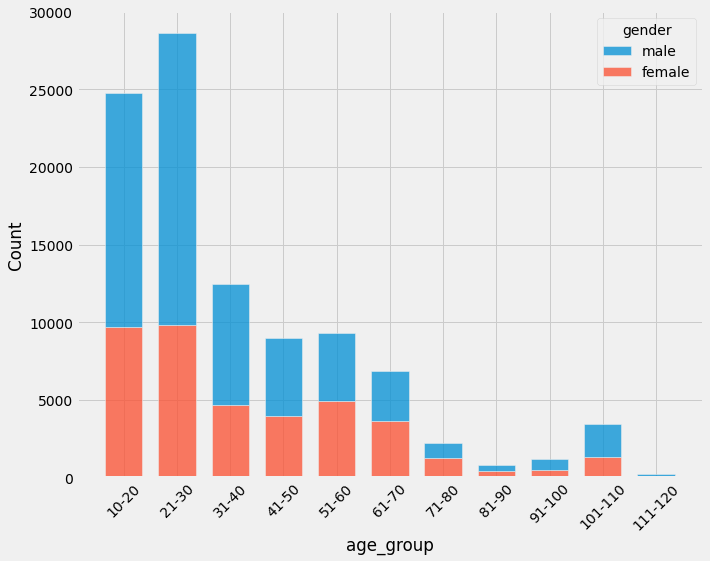

In [6]:
# age group vs count histogram
plt.subplots(figsize = (10,8))
sns.histplot(fb_data, x = 'age_group',shrink = 0.7,hue="gender",multiple="stack")
plt.xticks(rotation=45)
plt.show()

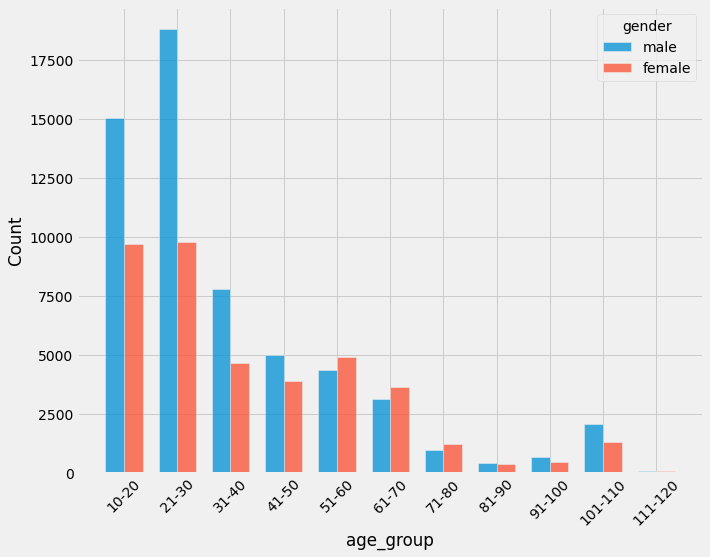

In [7]:
# age group vs count histogram
plt.subplots(figsize = (10,8))
sns.histplot(fb_data, x = 'age_group',shrink = 0.7,hue="gender",multiple="dodge")
plt.xticks(rotation=45)
plt.show()

# Gender wise analysis

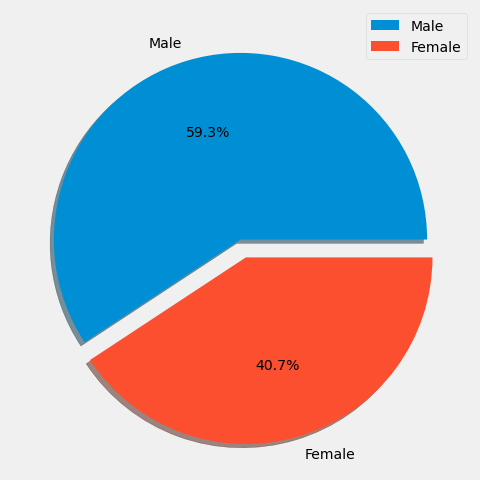

In [15]:
gender_counts = fb_data['gender'].value_counts()
plt.subplots(figsize=(10,8))
explode = [0,0.1]
plt.pie(gender_counts, labels = ['Male','Female'], autopct='%1.1f%%',explode=explode,shadow=True)
plt.legend()
plt.show()

<AxesSubplot:title={'center':'gender_counts'}>

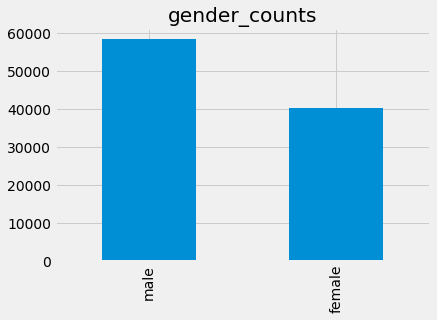

In [16]:
fb_data["gender"].value_counts().plot.bar(title = "gender_counts")

# LIKES COUNTS BY GENDER

In [17]:
df1 = fb_data.groupby(["gender"])["likes_received"].sum()
df1

gender
female    10121203
male       3977851
Name: likes_received, dtype: int64

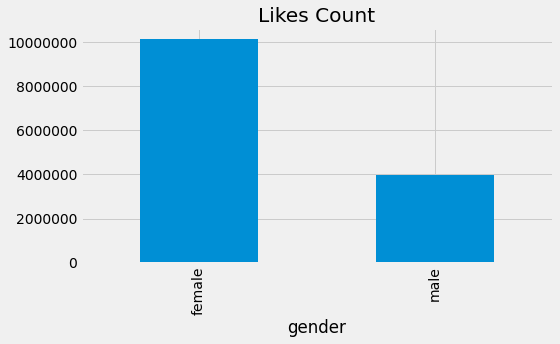

In [18]:
f = plt.figure(figsize=(8,5))
plt.ticklabel_format(style = 'plain')
df1.plot.bar()
plt.title("Likes Count")
plt.tight_layout()

# Inactive user 

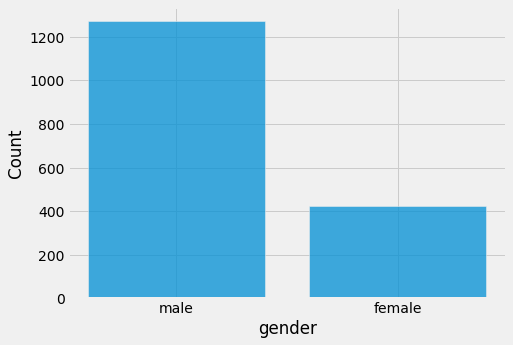

In [19]:
inactive_users = fb_data.query('friend_count == 0 and friendships_initiated == 0 and likes == 0')
plt.subplots(figsize = (7,5))
sns.histplot(data = inactive_users, x = 'gender', shrink = 0.8)
plt.show()

# Web users and mobile users

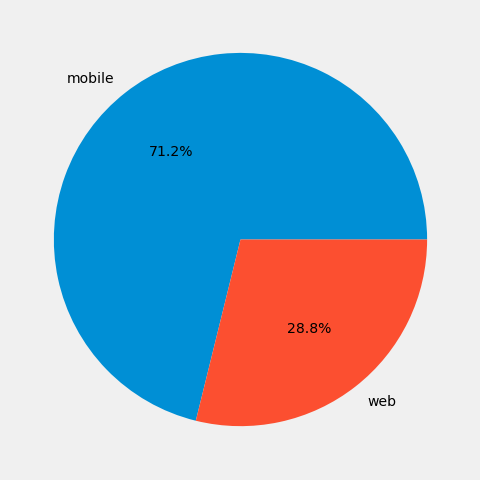

In [20]:
# first get all the active users
active_users = fb_data.query("friendships_initiated !=0 and likes != 0").reset_index(drop=True)

# get which platform they are using
active_users['use_method'] = (active_users['mobile_likes'] >= active_users['www_likes']).replace({True : 'mobile', False : 'web'})
active_users
# plot it
plt.subplots(figsize = (10,8))
plt.pie(active_users['use_method'].value_counts(), labels = ['mobile','web'], autopct='%1.1f%%')
plt.show()